In [1]:
#|default_exp app

# Bearify

In [2]:
!pip install -Uqq gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.2 MB/s et

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

def which_bear(x): pass

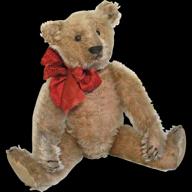

In [8]:
im = PILImage.create('/content/teddy.jpg')
im.thumbnail((192,192))
im

In [5]:
learn = load_learner('/content/bear_model.pkl')

In [9]:
learn.predict(im)

('teddy', tensor(2), tensor([4.8331e-05, 7.1999e-05, 9.9988e-01]))

In [10]:
categories = ('Teddy', 'Black', 'Grizzly')

def classify_image(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [11]:
classify_image(im)

{'Teddy': 4.833127968595363e-05,
 'Black': 7.199876563390717e-05,
 'Grizzly': 0.9998795986175537}

In [16]:
image = gr.inputs.Image(shape = (192,192))
labels = gr.outputs.Label()

intf = gr.Interface(fn=classify_image, inputs=image, outputs=labels)
intf.launch(inline=False)

AttributeError: module 'gradio' has no attribute 'inputs'